In [6]:
#Valores iniciales optimistas
import gym
import numpy as np
import matplotlib.pyplot as plt
import pickle
#se crea la clase agente que se encarga de entrenar el modelo y de graficar los resultados
class Agent:
    #se inicializan los parametros del agente
    def __init__(self, env_name, episodes, num_bins=10, learning_rate=0.9, discount_factor=0.95, epsilon=1, epsilon_decay_rate=0.0001, render=False):
        self.env = gym.make(env_name, render_mode="human" if render else None)
        self.num_bins = num_bins
        self.episodes = episodes
        self.rewards_per_episode = np.zeros(episodes)
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        self.bins = self.create_bins()
        self.q_table = np.full([num_bins] * len(self.env.observation_space.low) + [self.env.action_space.n], 10.0)
        self.rng = np.random.default_rng()
#se crean los bins para discretizar el estado
    def create_bins(self):
        bins = []
        for i in range(len(self.env.observation_space.low)):
            bins.append(np.linspace(self.env.observation_space.low[i], self.env.observation_space.high[i], self.num_bins + 1)[1:-1])
        return bins
#se discretiza el estado
    def discretize_state(self, state):
        discrete_state = tuple(
            np.digitize(state[i], self.bins[i]) - 1 for i in range(len(state))
        )
        return discrete_state
#se elige la accion a tomar
    def choose_action(self, state):
        discrete_state = self.discretize_state(state)
        if self.rng.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[discrete_state])
#se actualiza la tabla Q
#glosario formula del metodo valores iniciales optimistas
#Q(s,a) = Q(s,a) + alpha * (reward + gamma * max(Q(s',a')) - Q(s,a))
#s = estado actual
#a = accion actual
#alpha = tasa de aprendizaje
#reward = recompensa
#gamma = factor de descuento
#s' = nuevo estado
#a' = nueva accion
#Q(s,a) = valor de la tabla Q para el estado actual y la accion actual
#Q(s',a') = valor de la tabla Q para el nuevo estado y la nueva accion
#max(Q(s',a')) = valor maximo de la tabla Q para el nuevo estado
#se actualiza la tabla Q con la formula de valores iniciales
#Q(s,a) = Q(s,a) + alpha * (reward + gamma * max(Q(s',a')) - Q(s,a))

    def update_q_table(self, state, action, reward, new_state):
        discrete_state = self.discretize_state(state)
        new_discrete_state = self.discretize_state(new_state)
        self.q_table[discrete_state + (action,)] += self.learning_rate * (
            reward + self.discount_factor * np.max(self.q_table[new_discrete_state]) - self.q_table[discrete_state + (action,)]
        )
#se entrena el modelo
    def train(self, is_training=True, render=False):
        env = gym.make("LunarLander-v2", render_mode="human" if render else None)
        if not is_training:
            with open("lunar_lander_OIV.pkl", "rb") as f:
                self.q_table = pickle.load(f)

        for i in range(self.episodes):
            state = env.reset()[0]
            terminated = False
            truncated = False

            while not terminated and not truncated:
                action = self.choose_action(state)
                new_state, reward, terminated, truncated, _ = env.step(action)

                if is_training:
                    self.update_q_table(state, action, reward, new_state)

                state = new_state

            self.epsilon = max(self.epsilon - self.epsilon_decay_rate, 0)
            self.rewards_per_episode[i] = reward

            if (i+1) % 100 == 0:
                print(f"Episode: {i+1} - reward: {self.rewards_per_episode[i]}") 

        env.close()

        if is_training:
            with open("lunar_lander_OIV.pkl", "wb") as f:
                pickle.dump(self.q_table, f)
#se grafican los resultados
    def graficar(self):
        plt.plot(self.rewards_per_episode)
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title("Lunar Lander")
        plt.show()



In [7]:
#se entrena el modelo
agenteTrain = Agent(env_name="LunarLander-v2", episodes=5000)
agenteTrain.train(is_training=True, render=False)

Episode: 100 - reward: -100.0
Episode: 200 - reward: -100.0
Episode: 300 - reward: -100.0
Episode: 400 - reward: -100.0
Episode: 500 - reward: -100.0
Episode: 600 - reward: -100.0
Episode: 700 - reward: -100.0
Episode: 800 - reward: -100.0
Episode: 900 - reward: -100.0
Episode: 1000 - reward: -100.0
Episode: 1100 - reward: -100.0
Episode: 1200 - reward: -100.0
Episode: 1300 - reward: -100.0
Episode: 1400 - reward: -100.0
Episode: 1500 - reward: -100.0
Episode: 1600 - reward: -100.0
Episode: 1700 - reward: -100.0
Episode: 1800 - reward: -100.0
Episode: 1900 - reward: -100.0
Episode: 2000 - reward: -100.0
Episode: 2100 - reward: -100.0
Episode: 2200 - reward: -100.0
Episode: 2300 - reward: -100.0
Episode: 2400 - reward: -100.0
Episode: 2500 - reward: -100.0
Episode: 2600 - reward: -100.0
Episode: 2700 - reward: -100.0
Episode: 2800 - reward: -100.0
Episode: 2900 - reward: -100.0
Episode: 3000 - reward: -100.0
Episode: 3100 - reward: -100.0
Episode: 3200 - reward: -100.0
Episode: 3300 - r

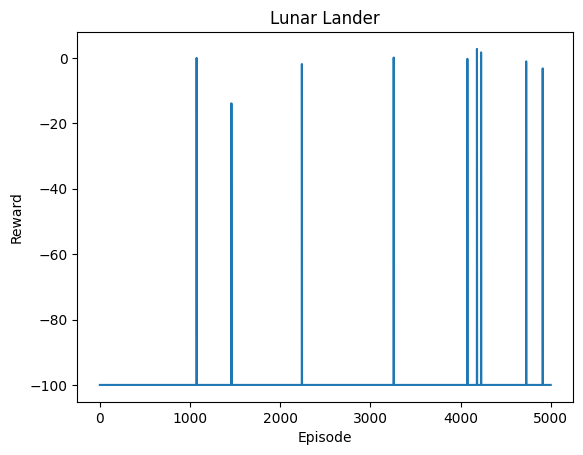

In [8]:
#se grafican los resultados
agenteTrain.graficar()

In [9]:
agenteTest = Agent(env_name="LunarLander-v2", episodes=15)
agenteTest.train(is_training=False, render=True)

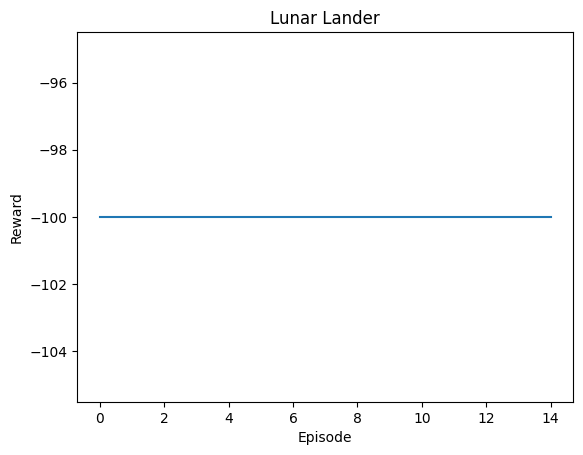

In [10]:
agenteTest.graficar()